The data set for this project is the "Wholesale Data" dataset containing information about various products sold by a grocery store. The project will involve the following tasks:

Exploratory data analysis and pre-processing: We will import and clean the data sets, analyze and visualize the relationships between the different variables, handle missing values and outliers, and perform feature engineering as needed.

Unsupervised learning: We will use the Wholesale Data dataset to perform k-means clustering, hierarchical clustering, and principal component analysis (PCA) to identify patterns and group similar data points together. We will determine the optimal number of clusters and communicate the insights gained through data visualization.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#We see no null values (good)

In [6]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [7]:
print(data['Channel'].unique())
print(data['Region'].unique())

[2 1]
[3 1 2]


In [8]:
# The number of uniques makes sense given that all columns are integer values, 
# and we expect either Channel or Region would be our target variables if this were a supervised learning project

In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
# the min values are a little suspicous and could indicate outliers,
# the jumps from the 3rd quartile to the max is VERY large (a factor of 10) and could also indicate outliers

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

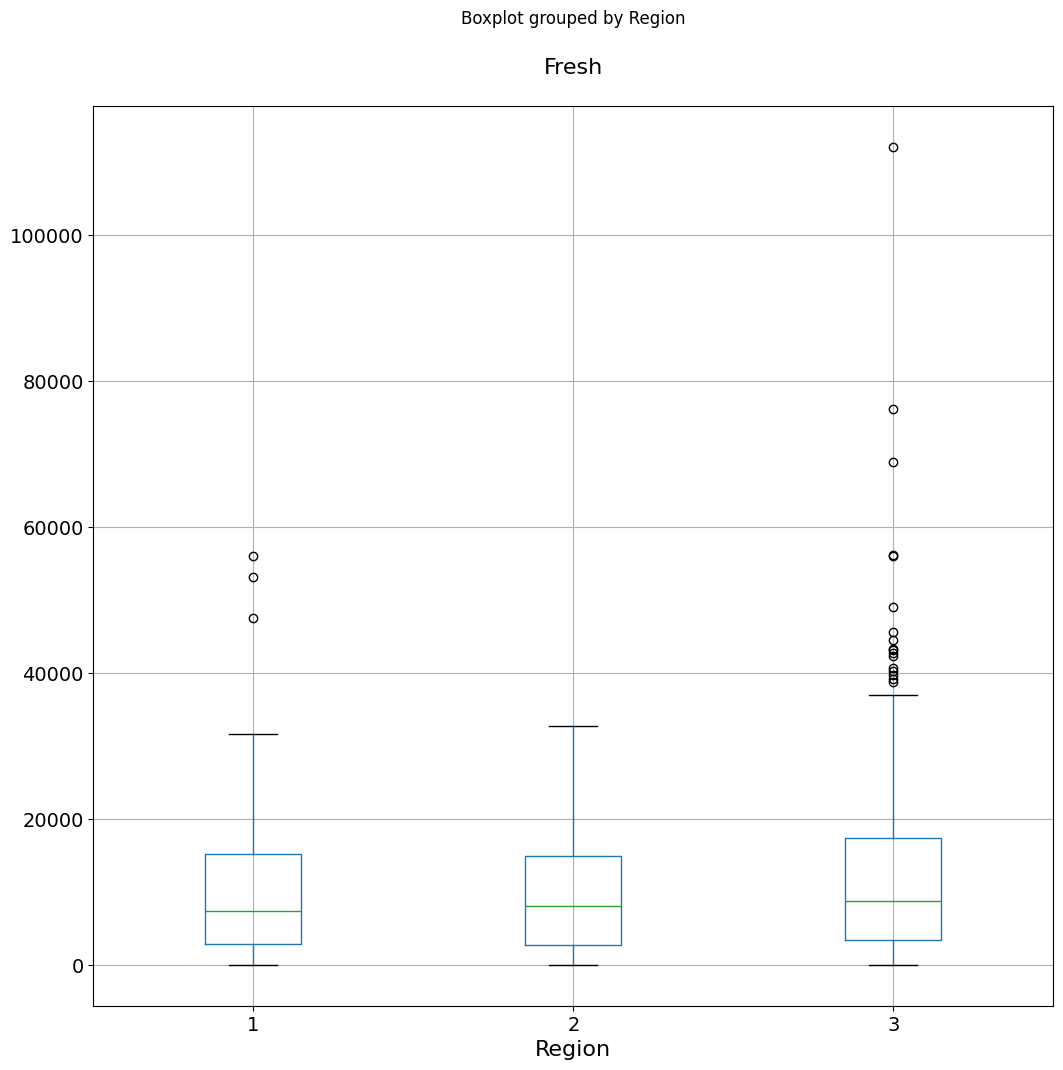

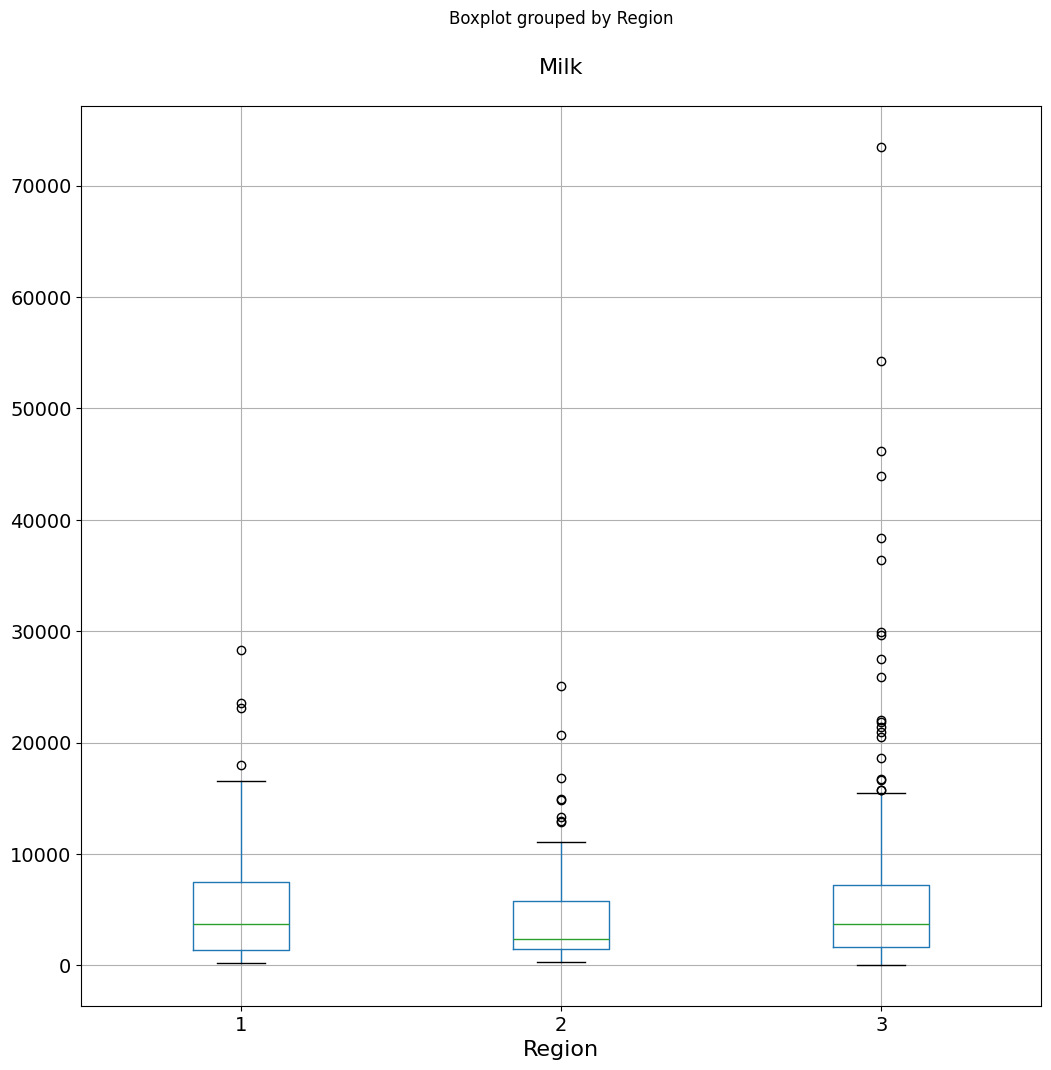

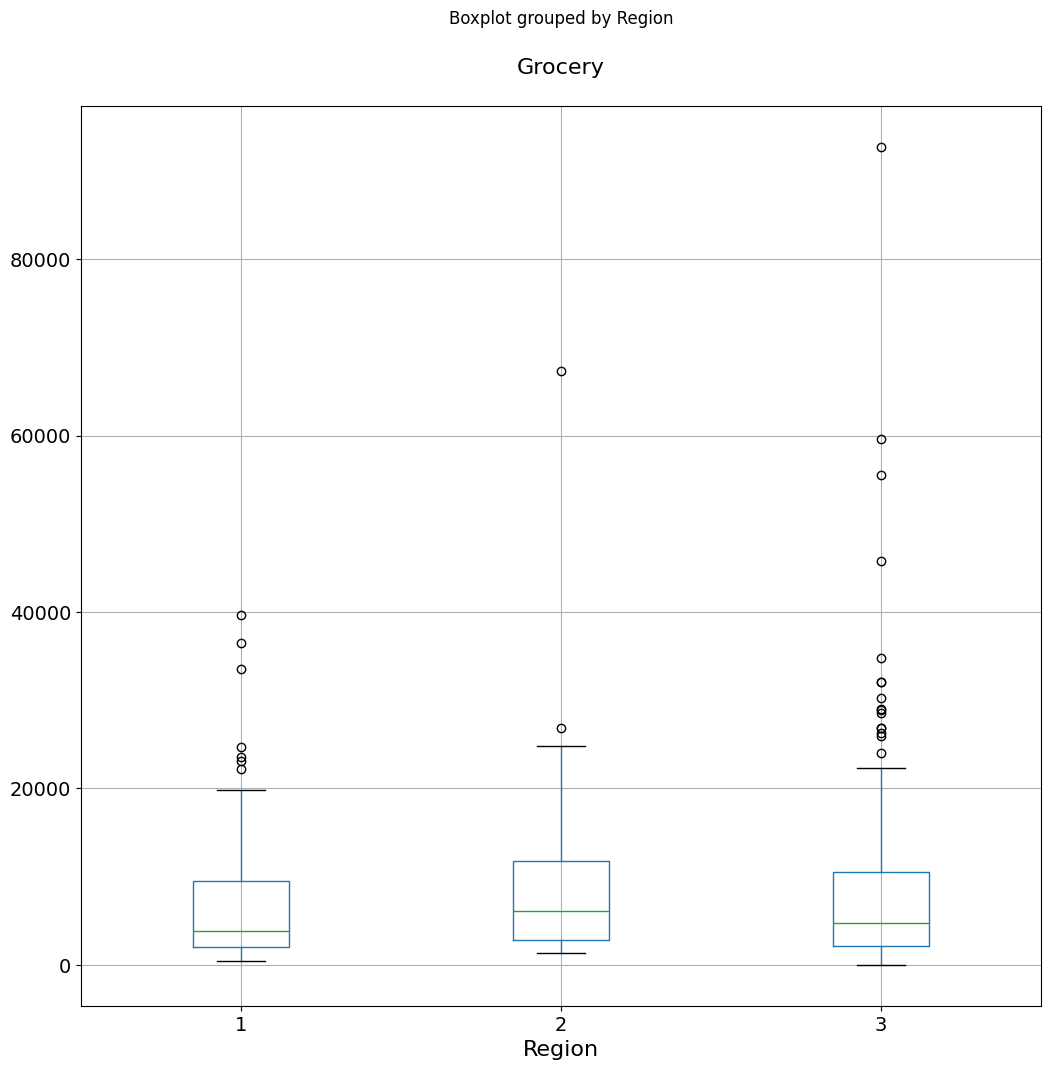

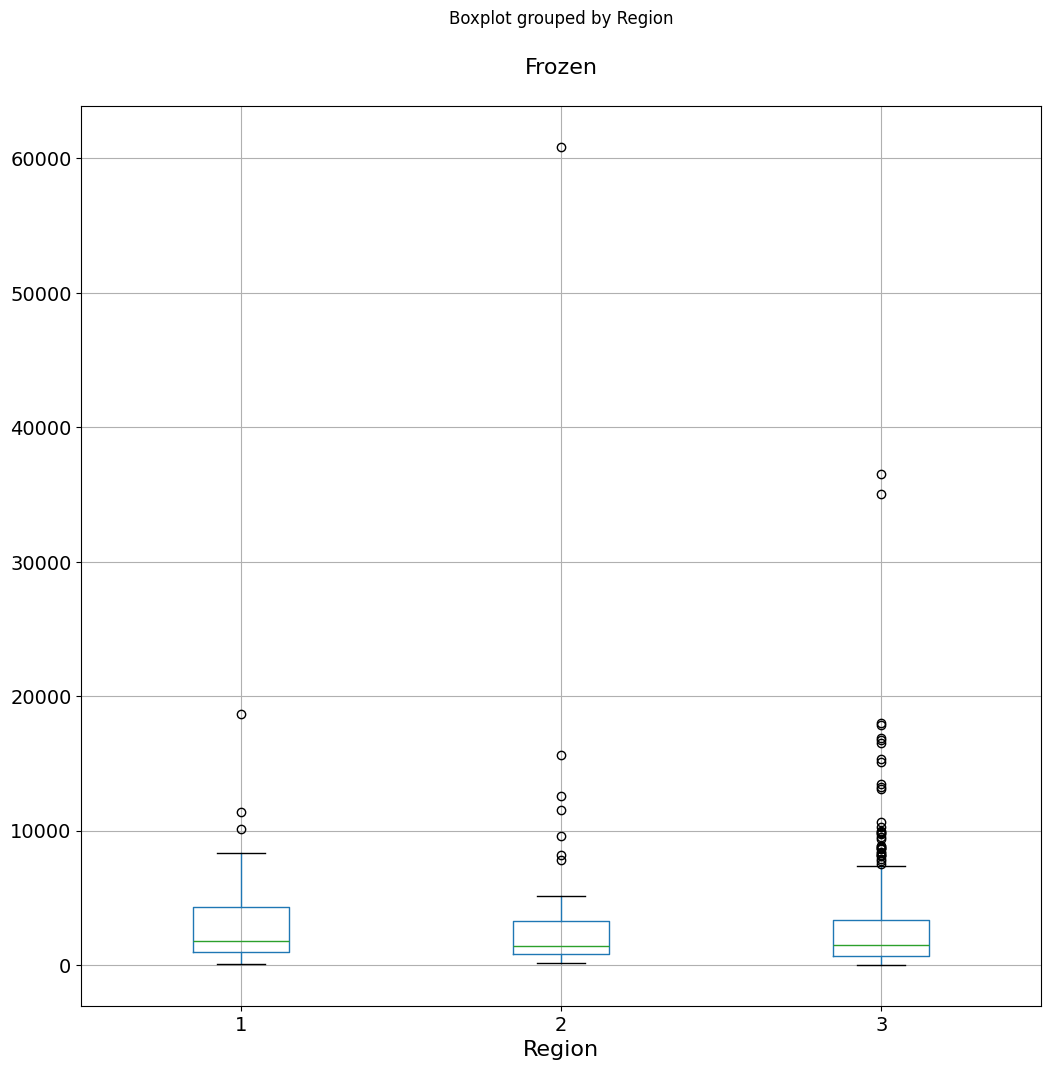

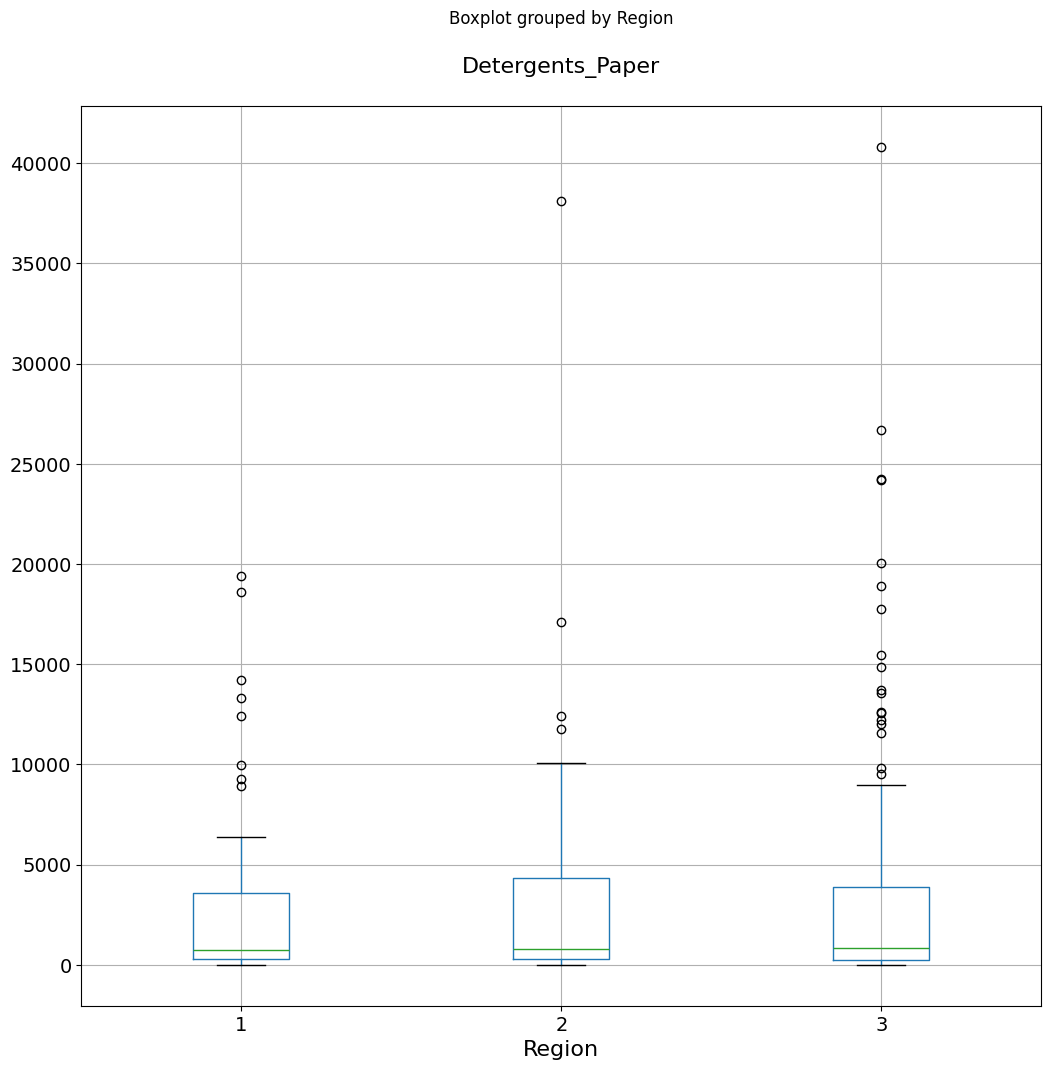

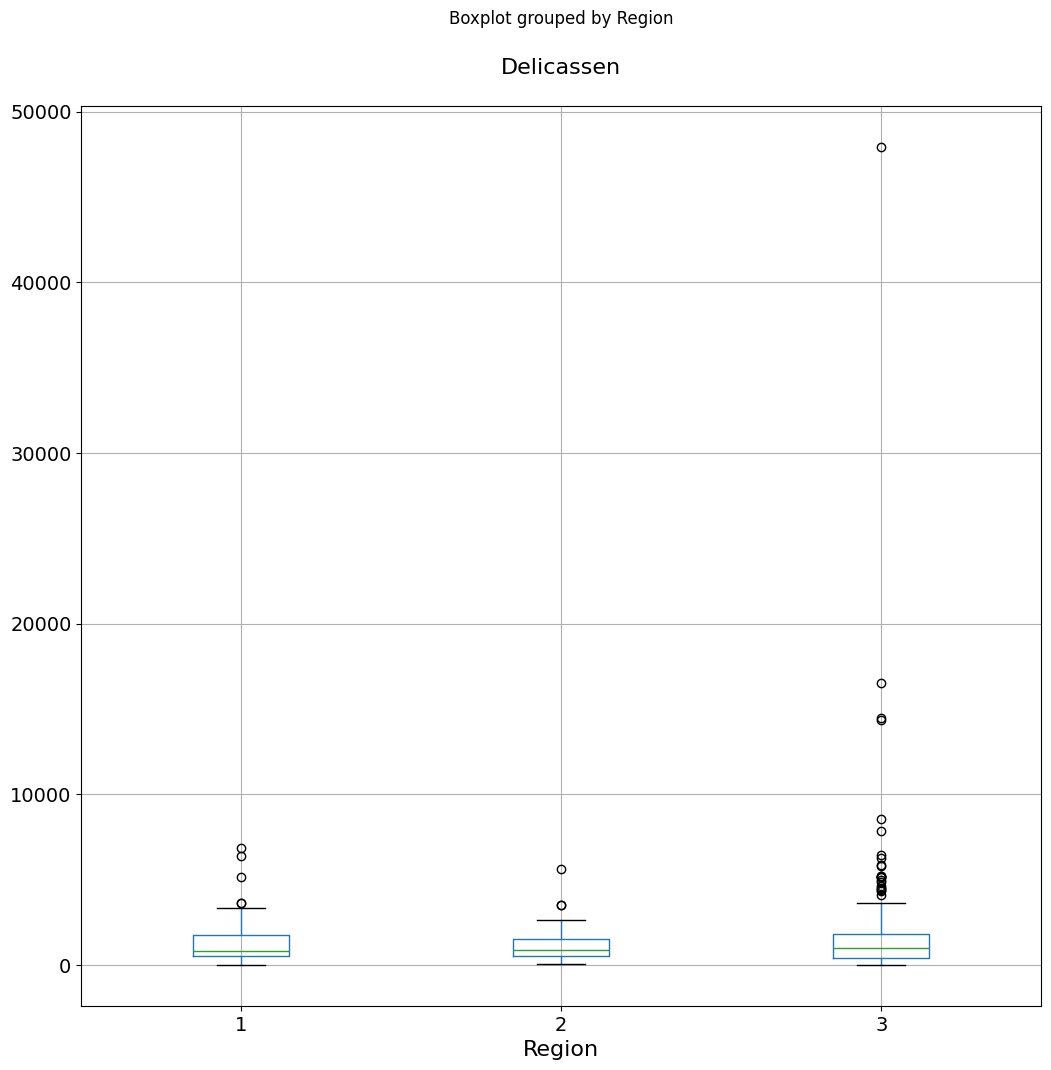

In [12]:
for c in data.columns[2:]:
    data.boxplot(c,by='Region',figsize=(12,12),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Region", fontsize=16)

In [13]:
# Yup... lots of outliers, it looks like. Let's scale and try to remove those

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data=data_scaled,columns=data.columns)

In [16]:
data_scaled.shape

(440, 8)

In [17]:
# y.shape

In [18]:
means = data_scaled.mean()
stds = data_scaled.std()
thresh = 3

In [19]:
data_no_outliers = data_scaled[((data_scaled - means).abs() <= thresh * stds).all(axis=1)]

In [20]:
data_no_outliers.shape

(414, 8)

In [21]:
#since this is an unsupervised learning project, we will not have a target variable, 
# but this dataset COULD be processed with such a thing in mind. To do so:

# X = data.drop(['Channel', 'Region'],axis=1)
# y = data[['Channel', 'Region']]
# X = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(data=X,columns=data.columns[2:])
# X_scaled.shape

In [22]:


# X = data_no_outliers.drop(['Channel', 'Region'],axis=1)
# y = data_no_outliers[['Channel', 'Region']]
# X = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(data=X,columns=data.columns[2:])
# print(X_scaled.shape)
# print(y.shape)

# # Without quite knowing how "Channel" and "Region" are related, 
# # I would propose to encode them into a single target variable to make clustering both easier and clearer
# y_copy = y.copy()

# # Concatenate the two columns to create a new target variable
# y_copy['target'] = y_copy['Channel'].astype(str) + '_' + y_copy['Region'].astype(str)
# y_copy.drop(['Channel','Region'],axis=1, inplace=True)
# y_copy.shape

# y_copy.nunique()
# here we see the expected shape and number of uniques
# we now have our independent and target variables scaled and with outliers removed
# We can proceed with fitting a model to predict this data.

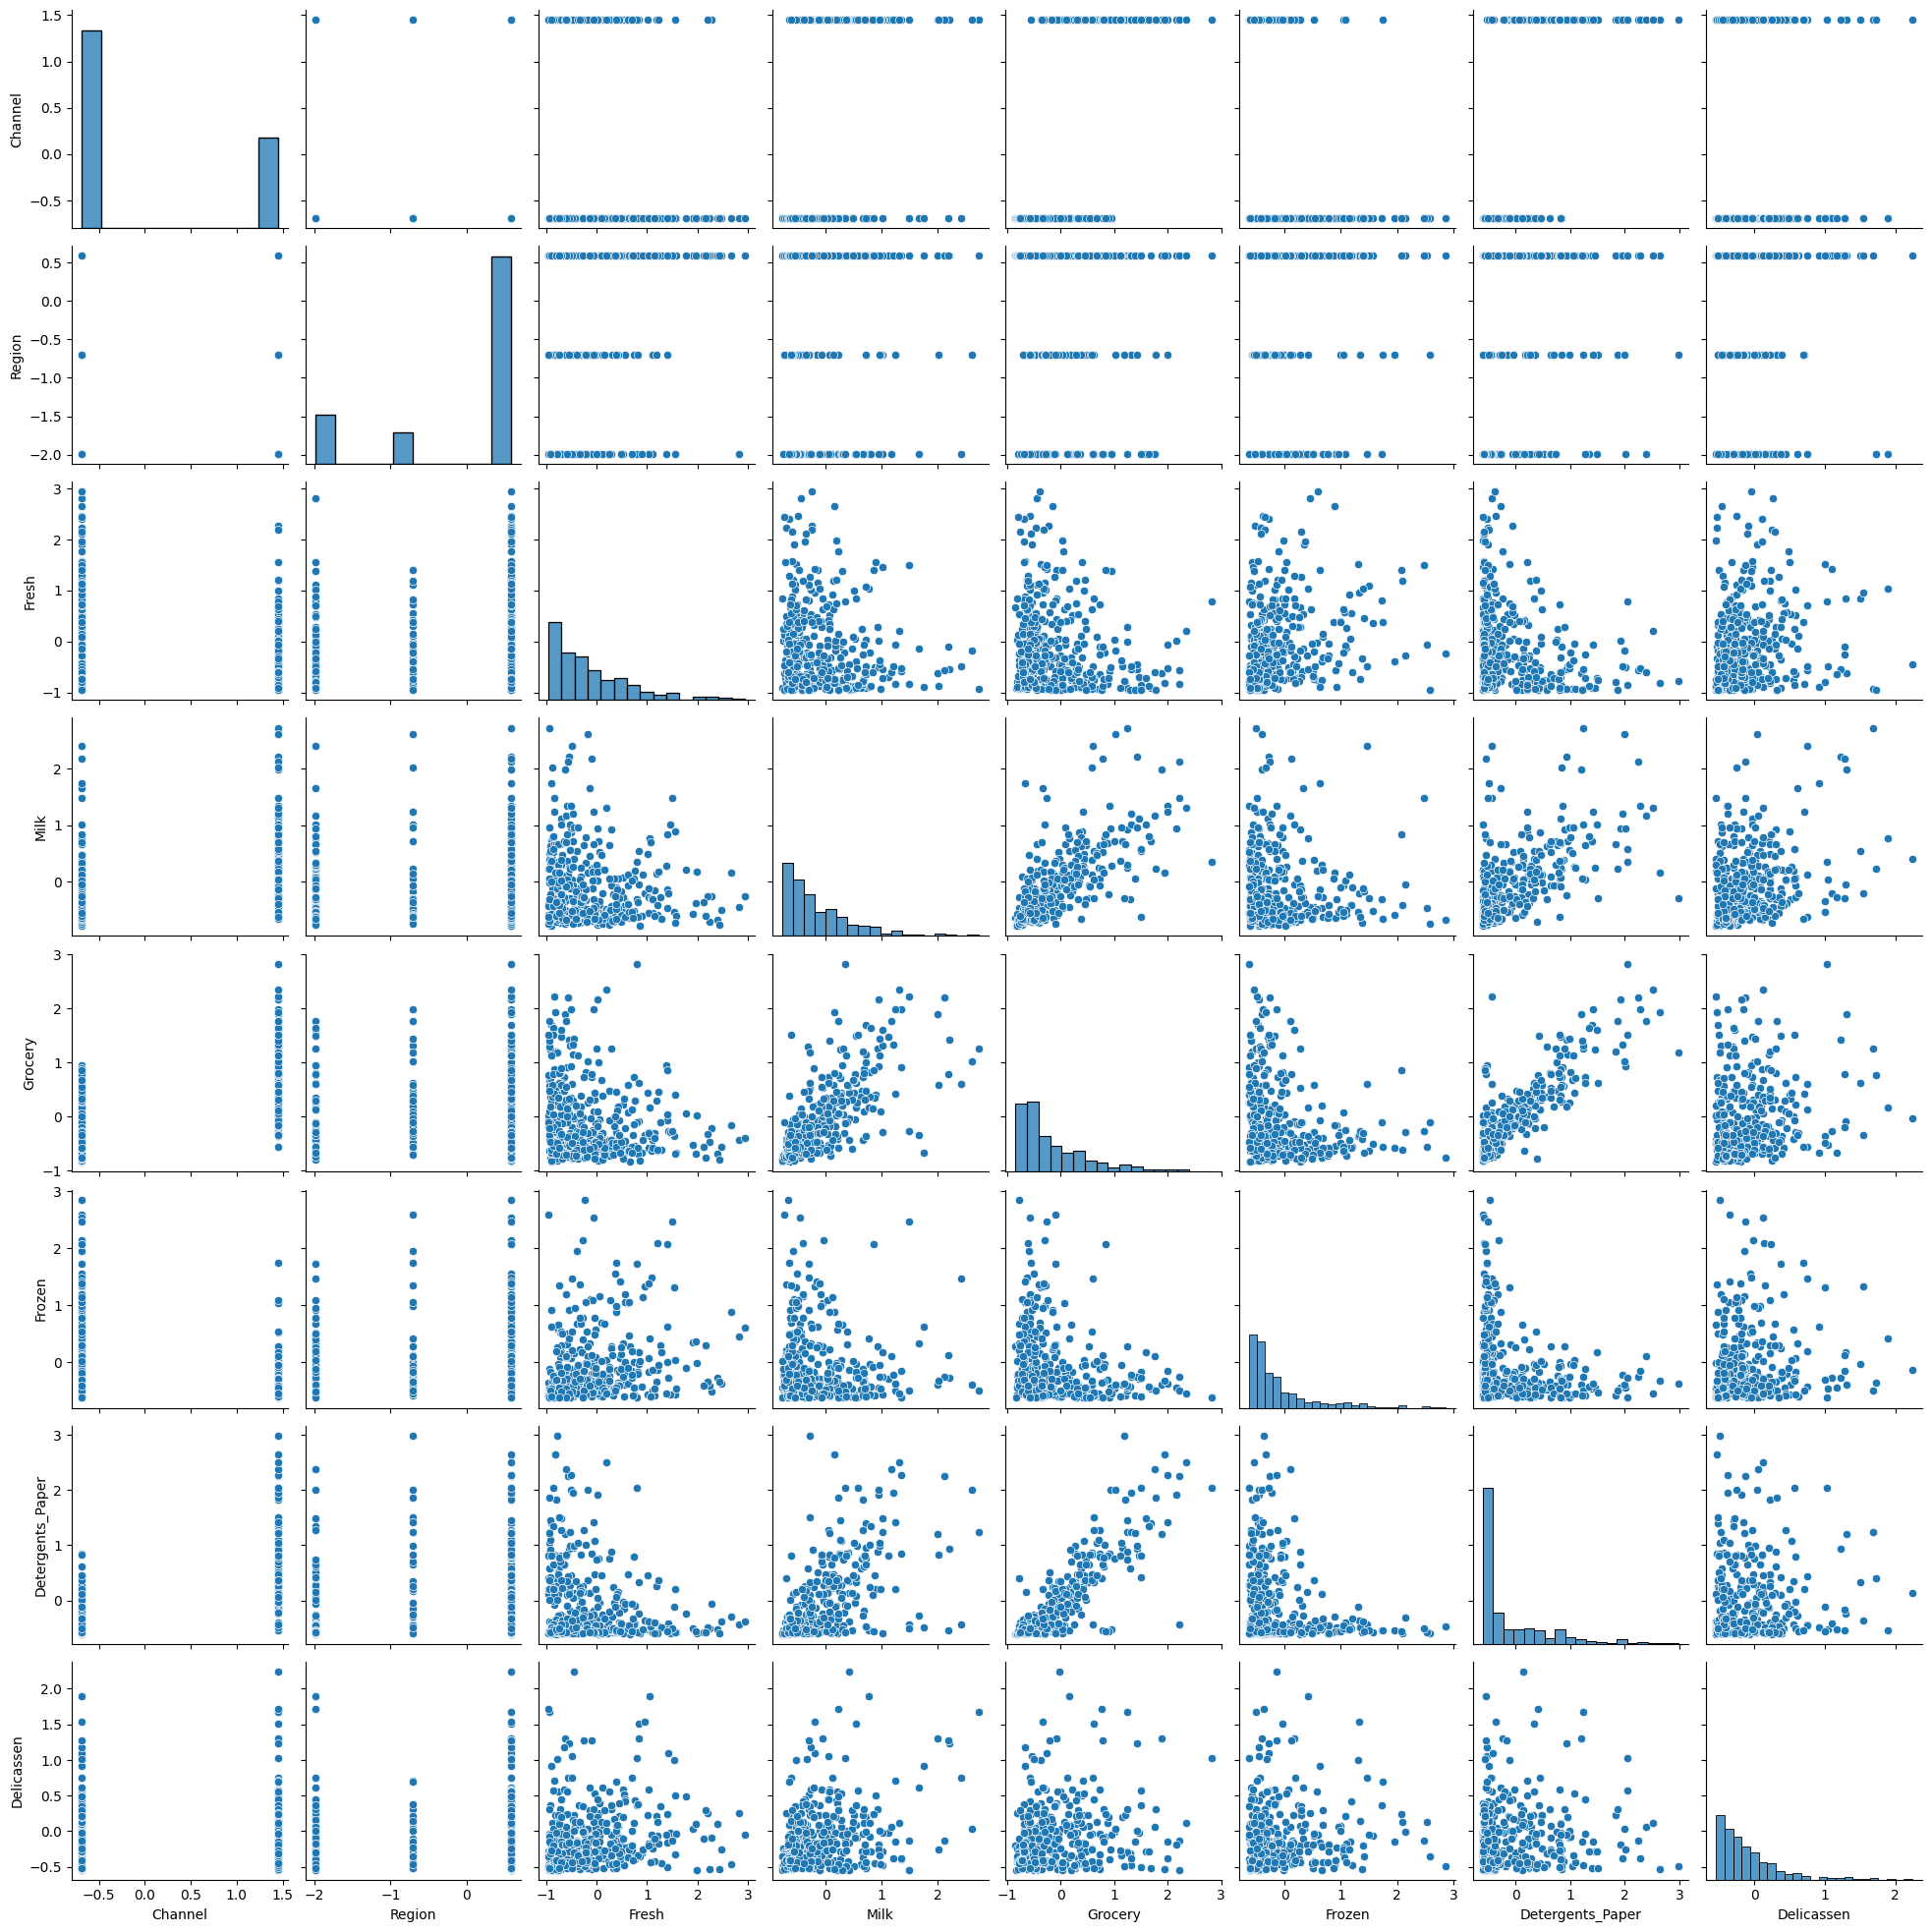

In [23]:
# just for fun, let's check the pairplots to see if there's any obvious correlations
sns.pairplot(data_no_outliers)

In [24]:
# We can see that most of the data is in Region 3, and there are about 50% more data points in Channel 1 than Channel 2
# there does seem to be some positive correlation going on between certain variables

In [25]:
# back to the primary reason for this project:
# Let's attempt to build a clustering model based on this

In [26]:
#kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans()

inertia = [] 
#inertia measures how well the dataset is clustered via KMeans

for n_clusters in range(1, 8):
    kmeans.set_params(n_clusters=n_clusters, n_init=10)
    kmeans.fit(data_no_outliers)
    inertia.append(kmeans.inertia_)

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

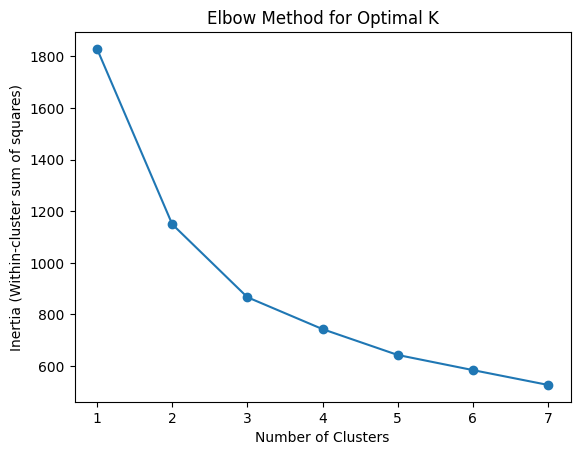

In [27]:
#Elbow graph to visualize the clusters
plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [28]:
# Based on this, three clusters looks correct
opt_k = 3

In [29]:
#now fit the kmeans with that number
kmeans = KMeans(n_clusters=opt_k, n_init=10, random_state=12)
kmeans_labels = kmeans.fit_predict(data_no_outliers) #this is the groups assigned to the dataset

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [30]:
#PCA - We will perform PCA to see if we can reduce the number of components to our model, making it a better fit without overfitting:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

data_pca = pca.fit(data_no_outliers)

In [31]:
#the explained variance ratios:
data_pca.explained_variance_ratio_

array([0.42553103, 0.2252081 , 0.13700036, 0.07590122, 0.05790255,
       0.04123996, 0.02539939, 0.01181739])

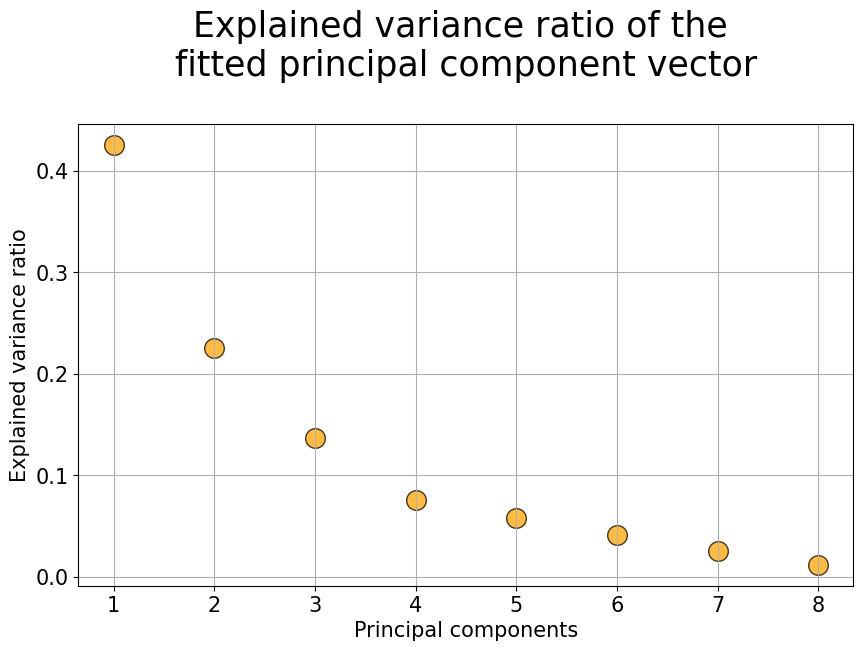

In [32]:
#plotting the explained variance ratio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(data_pca.explained_variance_ratio_))],
            y=data_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(data_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [33]:
# With four principal components we can explain more than 80% of the variance, but let's use 5%+ explained variance as our threshhold.  

In [34]:
pca_5 = PCA(n_components=5)

pca_results = pca_5.fit_transform(data_no_outliers)

In [35]:
final_pca = pd.DataFrame(data=pca_results)

In [36]:
final_pca

,0,1,2,3,4
0,1.330287,-0.603786,0.217665,-0.546008,0.287615
1,1.532187,-0.526366,-0.020873,-0.071584,0.397600
2,1.557769,-0.550798,0.351664,0.416662,0.231002
3,-0.997699,-0.638014,0.203083,0.558779,0.296938
4,0.898938,-0.758685,1.337121,-0.192457,0.644710
...,...,...,...,...,...
409,-0.379249,-0.738964,2.179917,1.953438,-0.170835
410,-1.469620,-0.953469,1.916707,-0.448146,-0.113686
411,3.761962,-0.387578,0.782431,0.318651,-1.217773
412,-0.894223,-0.613960,-0.341118,-0.164727,-0.245967


In [40]:
type(final_pca)

pandas.core.frame.DataFrame

In [37]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 6)


In [38]:
# clusters = ac.fit_predict(data_no_outliers)

In [41]:
clusters = ac.fit_predict(final_pca)
# adding the clusters to the dataframe
data_c = final_pca.copy()
data_c['clusters'] = clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(final_pca, clusters)

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#     # adding the clusters to the dataframe
# data_c = data_no_outliers.copy()
# data_c['clusters'] = clusters

In [ ]:
# from sklearn.metrics import silhouette_score
# silhouette_avg = silhouette_score(data_no_outliers, clusters)

In [42]:
silhouette_avg

0.31886936468901483

In [43]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

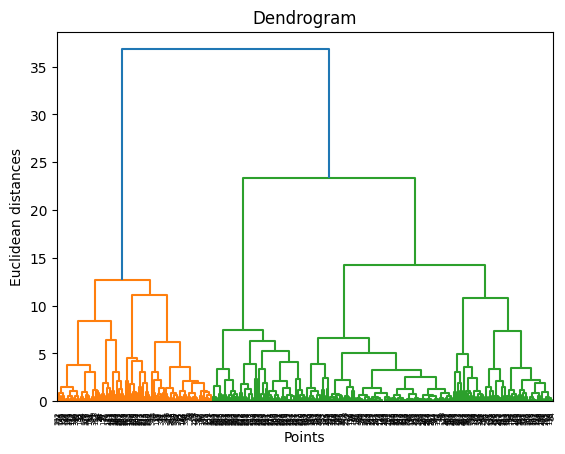

In [44]:
plot_dendrogram(final_pca)

In [ ]:
# plot_dendrogram(data_no_outliers)

In [48]:
# based off this dendogram, let's instead try to cluster using just two clusters and compare the silhouette_score

In [45]:
ac_rev = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [46]:
clusters_3 = ac_rev.fit_predict(pca_results)

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
silhouette_avg_rev = silhouette_score(data_no_outliers, clusters_3)
print(silhouette_avg_rev)

0.3964722018131714


In [48]:
# our silhouette score has improved! This is good.

In [ ]:
# From this analysis we can say that after performing PCA this data can be grouped into two clusters.